<a href="https://colab.research.google.com/github/Youssef-S-Ahmed/Car-Price-Prediction-/blob/main/Unemployment_Rate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


Understanding our Data
The datasets explains the unemployment and employment rate in percentage for different Regions in India for last one year


*   Estimated Unemployment Rate (%)
     (Unemployment rate)
*   Estimated Employed
     (Employment rate)
*   Estimated Labour Participation Rate (%)
     (the percentage of the working-age population typically refers to individuals aged 15 to 64, but it can vary based on country-specific definitions )
*   Region
     (Employment and unemployment rates in North,South, Eaast, West)





In [ ]:
df.rename(columns={' Region': "Region",
                        " Date": "Date",
                        " Frequency": "Frequency",
    ' Estimated Unemployment Rate (%)':"Estimated_Unemployment_Rate" ,
                        " Estimated Employed":"Estimated_Employed",
                       " Estimated Labour Participation Rate (%)":"Estimated_Labour_Participation_Rate",
                   'Region.1':"Region_1"}, inplace = True)

In [ ]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated_Unemployment_Rate,0
Estimated_Employed,0
Estimated_Labour_Participation_Rate,0
Region_1,0
longitude,0
latitude,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated_Unemployment_Rate          267 non-null    float64
 4   Estimated_Employed                   267 non-null    int64  
 5   Estimated_Labour_Participation_Rate  267 non-null    float64
 6   Region_1                             267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
# To Change Date Col from obj to date
df.Date = pd.to_datetime(df.Date)

<ipython-input-6-20b97a25c3b2>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.Date = pd.to_datetime(df.Date)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated_Unemployment_Rate          267 non-null    float64       
 4   Estimated_Employed                   267 non-null    int64         
 5   Estimated_Labour_Participation_Rate  267 non-null    float64       
 6   Region_1                             267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


Quantative Cols
1.   Estimated Unemployment Rate (%)
2.   Estimated Employed
3.   Estimated Labour Participation Rate (%)

Qualitative
1.   Region
2.   Region.1

In [ ]:
df.describe()

,Date,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


*   for Estimated unemployment Rate : mean > Median so data is Right skewed
*   for Estimated Employed Mean < Median so data is Left Skewed
*   for Estimated Labour Participation Rate : mean nearly Equal to median so it is Normal Dist

#Univariate Analysis

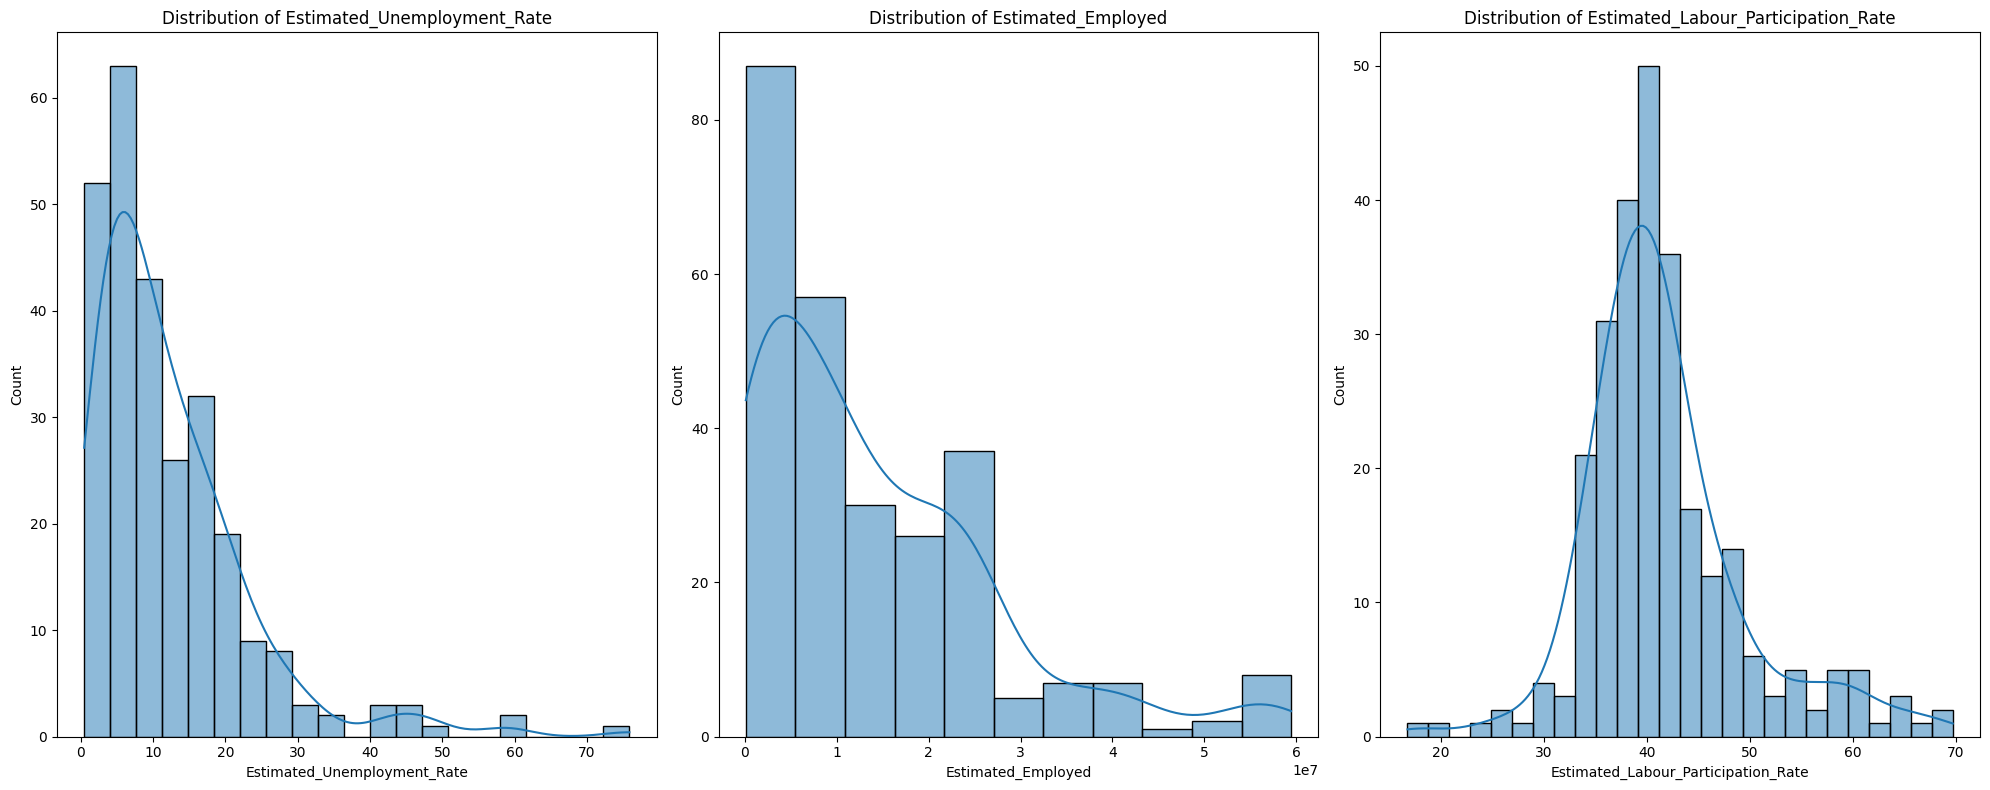

In [ ]:
# Distribution for Data
plt.figure(figsize=(20,8))
for e,i in enumerate(df.columns[3:6]):
  plt.subplot(1,3,e+1)
  plt.title("Distribution of "+i)
  sns.histplot(df[i], kde = True)
  plt.tight_layout()

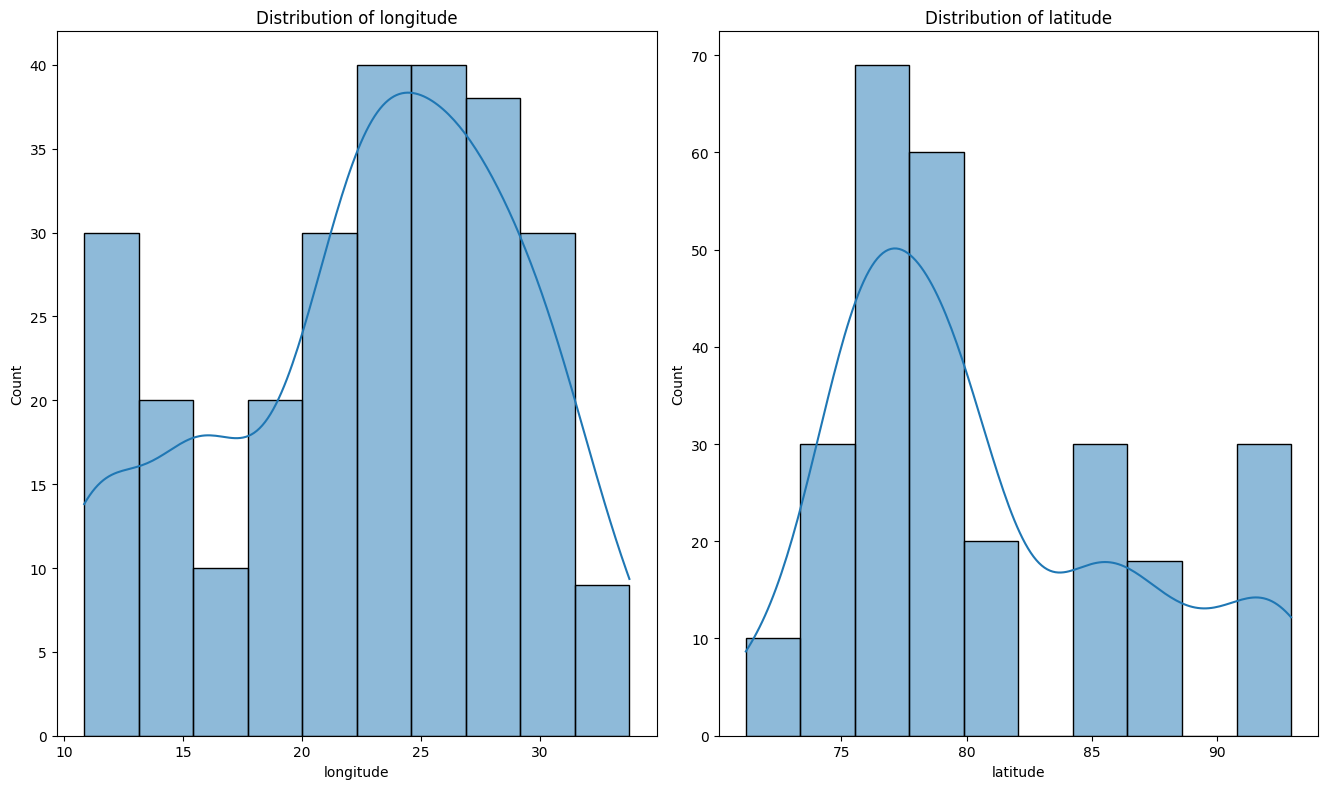

In [ ]:
# Distribution for Data
plt.figure(figsize=(20,8))
for e,i in enumerate(df.columns[7:]):
  plt.subplot(1,3,e+1)
  plt.title("Distribution of "+i)
  sns.histplot(df[i], kde = True)
  plt.tight_layout()

#Categorical Univariate

In [ ]:
px.bar(data_frame = df.Region.value_counts(),
       title = 'Distribution of Regions')

In [ ]:
px.pie(data_frame = df , names = "Region" , title = "Percentage of Region")

In [ ]:
px.bar(data_frame = df.Region_1.value_counts(),
       title = 'Distribution of Regions.1')

In [ ]:
px.pie(data_frame = df , names = "Region_1" , title = "Percentage of Region_1")

1. 29.6% of Our Data is in North
2. 22.5% in South

#Bivariate Analysis

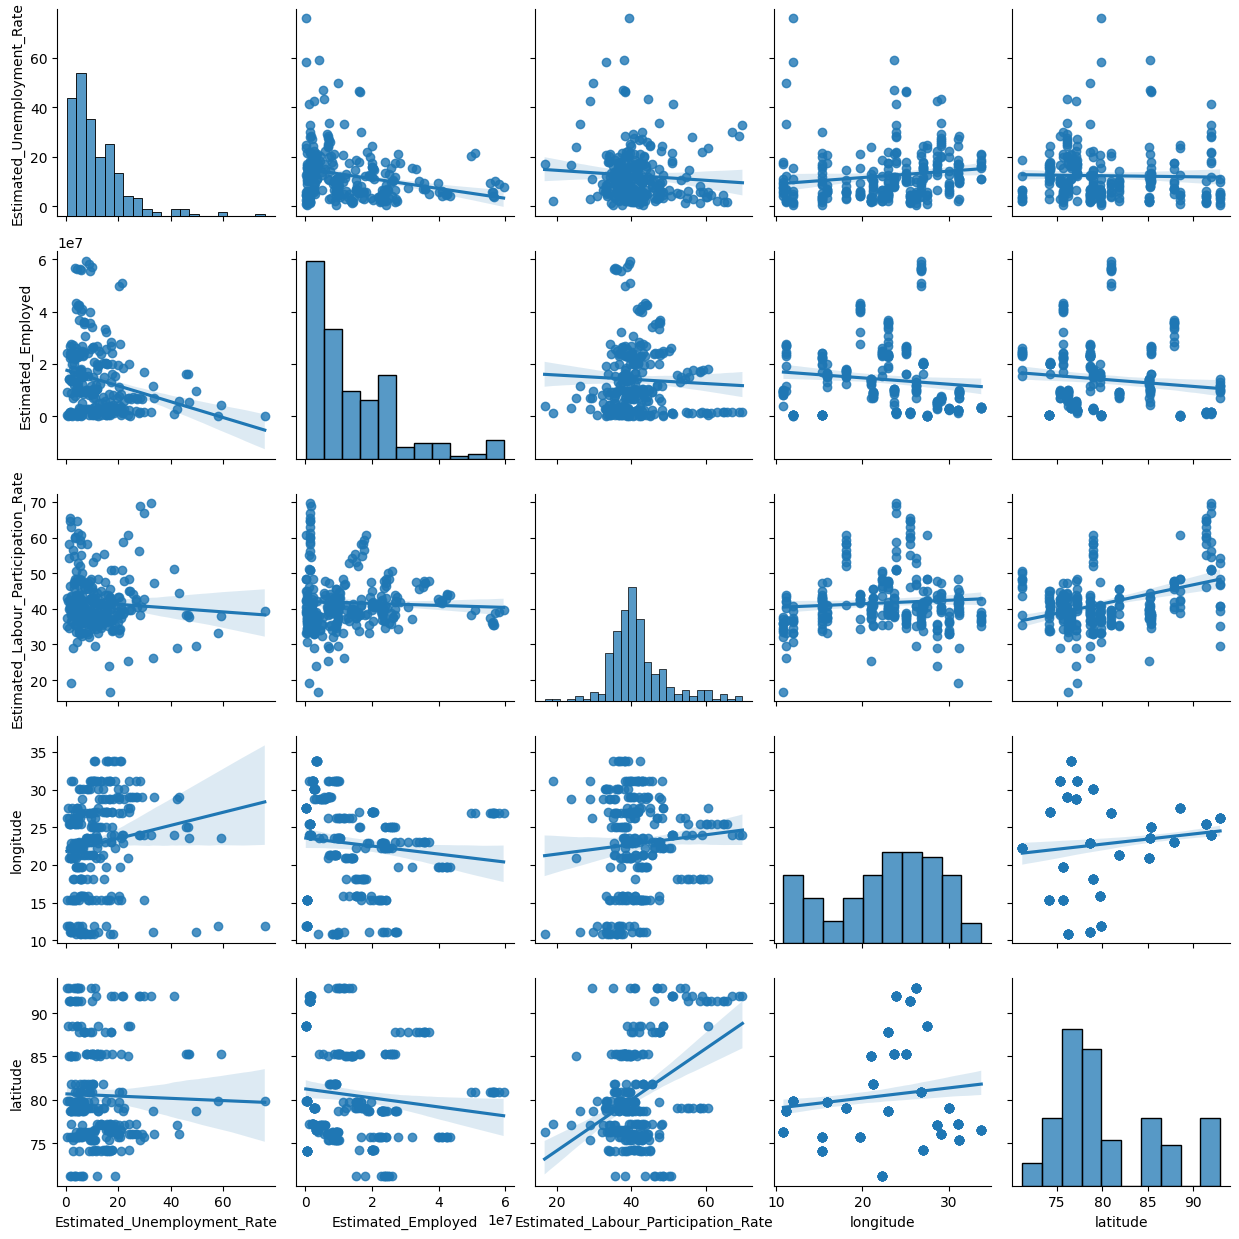

In [ ]:
corr = df[["Estimated_Unemployment_Rate", "Estimated_Employed","Estimated_Labour_Participation_Rate","longitude",'latitude']]
sns.pairplot(corr,kind = 'reg')
plt.tight_layout()

Text(0.5, 1.0, 'correlation between numerical values')

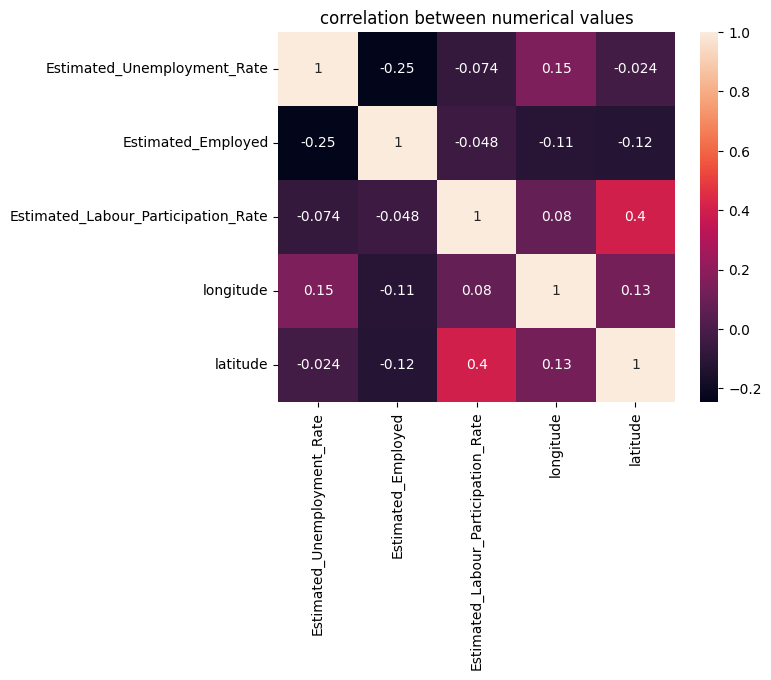

In [ ]:
#heatmap
sns.heatmap(corr.corr(), annot =True)
plt.title('correlation between numerical values')

Checking on Outliers

In [ ]:
px.box(data_frame = df, x="Estimated_Labour_Participation_Rate")

From the above graph we Consider ouliers



1.   less than 19.04
2.   More Than 62.96

In [ ]:
UB = 62.96
LB = 19.04
df[df.Estimated_Labour_Participation_Rate > UB].count()

,0
Region,6
Date,6
Frequency,6
Estimated_Unemployment_Rate,6
Estimated_Employed,6
Estimated_Labour_Participation_Rate,6
Region_1,6
longitude,6
latitude,6


In [ ]:
df[df.Estimated_Labour_Participation_Rate < LB].count()

,0
Region,1
Date,1
Frequency,1
Estimated_Unemployment_Rate,1
Estimated_Employed,1
Estimated_Labour_Participation_Rate,1
Region_1,1
longitude,1
latitude,1


In [ ]:
df = df[df.Estimated_Labour_Participation_Rate < UB]
df = df[df.Estimated_Labour_Participation_Rate > LB]

In [ ]:
df[df.Estimated_Labour_Participation_Rate < LB].count()

,0
Region,0
Date,0
Frequency,0
Estimated_Unemployment_Rate,0
Estimated_Employed,0
Estimated_Labour_Participation_Rate,0
Region_1,0
longitude,0
latitude,0


In [ ]:
df[df.Estimated_Labour_Participation_Rate > UB].count()

,0
Region,0
Date,0
Frequency,0
Estimated_Unemployment_Rate,0
Estimated_Employed,0
Estimated_Labour_Participation_Rate,0
Region_1,0
longitude,0
latitude,0


**Region vs Estimtated Region**

In [ ]:
group_em = df.groupby("Region", as_index=False)["Estimated_Labour_Participation_Rate"].mean().sort_values("Estimated_Labour_Participation_Rate",ascending = False)
group_em

,Region,Estimated_Labour_Participation_Rate
15,Meghalaya,56.800000
22,Telangana,54.972000
23,Tripura,53.308571
20,Sikkim,45.756250
6,Gujarat,45.490000
26,West Bengal,45.158000
1,Assam,43.498000
8,Himachal Pradesh,42.608889
7,Haryana,42.100000
11,Karnataka,42.000000


In [ ]:
px.bar(data_frame = group_em,x="Region",y="Estimated_Labour_Participation_Rate",
       title = 'Distribution of mean for Regions')

1.   Meghalaya Comes with the highst mean for Estimated Labour Participation Rate (56.8)
2.   Kerla Comes with the lowest mean for Estimated Labour Participation Rate (35.22)

**Region vs Estimated Unemployment Rate**

In [ ]:
group_unem = df.groupby("Region", as_index=False)["Estimated_Unemployment_Rate"].mean().sort_values("Estimated_Unemployment_Rate",ascending = False)
group_unem

,Region,Estimated_Unemployment_Rate
7,Haryana,27.477000
23,Tripura,22.790000
10,Jharkhand,19.539000
2,Bihar,19.471000
4,Delhi,18.414000
17,Puducherry,17.942000
8,Himachal Pradesh,17.605556
9,Jammu & Kashmir,16.477778
19,Rajasthan,15.868000
21,Tamil Nadu,12.187000


In [ ]:
px.bar(data_frame = group_unem,x="Region",y="Estimated_Unemployment_Rate",
       title = 'Distribution of mean for Regions')

1.   Haryana Comes with the Highst mean for Estimated Unemployment Rate (27.47)
2.   Meghalaya Comes with the lowset mean for Estimated Unemployment Rate (4.83)

**Region vs Estimated Employed **

In [ ]:
group_emRate = df.groupby("Region", as_index=False)["Estimated_Employed"].mean().sort_values("Estimated_Employed",ascending = False)
group_emRate

,Region,Estimated_Employed
24,Uttar Pradesh,5.552480e+07
14,Maharashtra,3.920476e+07
26,West Bengal,3.330516e+07
2,Bihar,2.360683e+07
6,Gujarat,2.273075e+07
13,Madhya Pradesh,2.231834e+07
21,Tamil Nadu,2.198790e+07
11,Karnataka,2.162402e+07
19,Rajasthan,1.973175e+07
22,Telangana,1.624408e+07


In [ ]:
px.bar(data_frame = group_emRate, x="Region",y="Estimated_Employed",
       title = 'Distribution of mean for Regions vs Estimated Employed')

Ultar Pradesh Comes with the highst mean of Estimated Employed (55.5248M)

#GeoDataFrame

In [ ]:
# geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
# gdf = gpd.GeoDataFrame(df, geometry=geometry)
# gdf

In [ ]:
# Here's an example of how you can use folium to create a simple map:
import folium
# map = folium.Map(location=[21.39, 84.29], zoom_start=13)
map = folium.Map(location=[24.6, 82.4], zoom_start=5)

In [ ]:
points = df.iloc[:,7:].values
for point in points:
    folium.Marker(point, popup='Point').add_to(map)

In [ ]:
import folium

# Assuming 'df' is your DataFrame and 'rate_of_employment' is the column name
for index, row in df.iterrows():
    point = row.iloc[7:].values
    popup_content = f"<b>Region:</b> {row['Region']}<br><b>Estimated_Unemployment_Rate:</b> {row['Estimated_Unemployment_Rate']}"
    folium.Marker(point, popup=popup_content).add_to(map)

In [ ]:
map

**Region_1 vs Estimtaed Labour Rate**

In [ ]:
Region_Estlabour = df.groupby("Region_1", as_index=False)["Estimated_Labour_Participation_Rate"].mean().sort_values("Estimated_Labour_Participation_Rate",ascending = False)
Region_Estlabour

,Region_1,Estimated_Labour_Participation_Rate
2,Northeast,48.870645
4,West,41.257000
3,South,40.837288
0,East,40.108750
1,North,38.954744


In [ ]:
px.bar(data_frame = Region_Estlabour,x="Region_1",y="Estimated_Labour_Participation_Rate",
       title = 'Distribution of mean for Regions')

NorthEast has the highst Average Estimated labour participation rate

**Region vs Estimated unemployment**

In [ ]:
Region_EstUnem= df.groupby("Region_1", as_index=False)["Estimated_Unemployment_Rate"].mean().sort_values("Estimated_Unemployment_Rate",ascending = False)
Region_EstUnem

,Region_1,Estimated_Unemployment_Rate
1,North,16.065128
0,East,13.916000
3,South,10.343898
2,Northeast,10.176129
4,West,8.239000


In [ ]:
px.bar(data_frame = Region_EstUnem,x="Region_1",y="Estimated_Unemployment_Rate",
       title = 'Distribution of mean for Regions')

North has the highst Average Estimated unemployment rate

#Time Series

**Date vs Estimated Unemployment**

In [ ]:
date_unemp = df[["Date","Estimated_Unemployment_Rate"]] # new list
date_unemp = date_unemp.set_index("Date") #set date as index
date_unemp = date_unemp.Estimated_Unemployment_Rate.resample(rule = "1M").nunique()
date_unemp

,Estimated_Unemployment_Rate
Date,
2020-01-31,22
2020-02-29,25
2020-03-31,24
2020-04-30,24
2020-05-31,27
2020-06-30,27
2020-07-31,26
2020-08-31,26
2020-09-30,26


In [ ]:
# plot time series graph
px.line(data_frame= date_unemp)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



very high inc in Umemployment rate during 31/5/2020 (Crona Virus)

**Date vs Estimated Labour Participation Rate**

In [ ]:
date_emp = df[["Date","Estimated_Labour_Participation_Rate"]] # new list
date_emp = date_emp.set_index("Date") #set date as index
date_emp = date_emp.Estimated_Labour_Participation_Rate.resample(rule = "1M").nunique()
date_emp

,Estimated_Labour_Participation_Rate
Date,
2020-01-31,24
2020-02-29,25
2020-03-31,25
2020-04-30,24
2020-05-31,27
2020-06-30,27
2020-07-31,25
2020-08-31,27
2020-09-30,25


In [ ]:
# plot time series graph
px.line(data_frame= date_emp)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



we can see that the rate of labour force inc in 31/5/2020 whiich means that at corna virus % of working age pop inc

**Date vs Estimated Employed**

In [ ]:
date_empRatio = df[["Date","Estimated_Employed"]] # new list
date_empRatio = date_empRatio.set_index("Date") #set date as index
date_empRatio = date_empRatio.Estimated_Employed.resample(rule = "1M").nunique()
date_empRatio

,Estimated_Employed
Date,
2020-01-31,24
2020-02-29,25
2020-03-31,25
2020-04-30,24
2020-05-31,27
2020-06-30,27
2020-07-31,26
2020-08-31,27
2020-09-30,26


In [ ]:
# plot time series graph
px.line(data_frame= date_empRatio)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#Multivariate

**Estimated Unemployment Rate vs Region and Country**

In [ ]:
fig = px.bar(df, x="Region_1", y="Estimated_Unemployment_Rate", color="Region", barmode="group")
fig.show()

1.   Puducherry Comes with the Highst Estimated unemployment Rate in South Region
2.   Tripura Comes with Highst Estimated Unemployment Rate in NorthEast Region
3.   Jharkhand & Bihar Comes with Highst Estimated Unemployment Rate in East Region
4.  Goa Comes with Highst Estimated Unemployment Rate in West Region
5.  Haryana Comes with Highst Estimated Unemployment Rate in north Region

**Region vs Estimated Employed vs Country**

In [ ]:
fig = px.bar(df, x="Region_1", y="Estimated_Employed", color="Region", barmode="group")
fig.show()

1.   Tami Nadu Comes with the Highst Estimated Employed Rate in South Region
2.   Assam Comes with Highst Estimated Employed Rate in NorthEast Region
3.   West Bengai Comes with Highst Estimated Employed Rate in East Region
4.  Maharashtra Comes with Highst Estimated Unemployment Rate in West Region
5.  Uttar Pradesh Comes with Highst Estimated Unemployment Rate in north Region

#Time Series

**Date Vs Estimtaed Labour Participation Rate vs Country**

In [ ]:
grouping = df[['Region_1','Estimated_Labour_Participation_Rate','Date']]
grouping = grouping.set_index("Date")
grouping = grouping.groupby(["Date","Region_1"])["Estimated_Labour_Participation_Rate"].mean().unstack()
norm = grouping/grouping.iloc[0,:]
plt.figure(figsize=(15, 8))
px.line(data_frame = norm)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<Figure size 1500x800 with 0 Axes>